# IMPORT PACKAGES & LOAD DATA

In [70]:
import numpy as np
import pandas as pd

In [71]:
mod1 = pd.read_csv("mod1.csv")

# DATA UNDERSTANDING

In [72]:
mod1.head()

,STUDENT ID,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,...,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA,SEM1 MATH,SEM1 PHY,SEM1 CHEM,SEM1 BIO,SEM2 CGPA
0,2019/2020|MS1918176789,0,1,1,3,0,2,1,1,6,...,6,5,5,3,1,2,1,1,2,1
1,2019/2020|MS1818177321,0,1,2,3,0,2,1,0,1,...,5,4,6,5,1,1,4,2,5,1
2,2019/2020|MS1918177022,0,1,1,3,0,2,1,1,7,...,7,2,4,5,1,4,1,3,3,1
3,2019/2020|MS1818177340,0,1,2,3,0,2,8,2,2,...,5,3,6,4,2,3,5,4,1,2
4,2019/2020|MS1818177124,0,1,2,3,0,2,1,2,3,...,3,4,6,5,1,1,5,3,2,1


In [73]:
mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STUDENT ID      1241 non-null   object
 1   LEARNING STYLE  1241 non-null   int64 
 2   PROGRAM         1241 non-null   int64 
 3   YEAR            1241 non-null   int64 
 4   RACE            1241 non-null   int64 
 5   GENDER          1241 non-null   int64 
 6   RELIGION        1241 non-null   int64 
 7   STATE           1241 non-null   int64 
 8   REGION          1241 non-null   int64 
 9   INCOME          1241 non-null   int64 
 10  DEPENDENTS      1241 non-null   int64 
 11  SCHOOL          1241 non-null   int64 
 12  SPM ADDMATH     1241 non-null   int64 
 13  SPM PHY         1241 non-null   int64 
 14  SPM CHEM        1241 non-null   int64 
 15  SPM BIO         1241 non-null   int64 
 16  SEM1 CGPA       1241 non-null   int64 
 17  SEM1 MATH       1241 non-null   int64 
 18  SEM1 PHY

In [74]:
mod1.isnull().sum()

STUDENT ID        0
LEARNING STYLE    0
PROGRAM           0
YEAR              0
RACE              0
GENDER            0
RELIGION          0
STATE             0
REGION            0
INCOME            0
DEPENDENTS        0
SCHOOL            0
SPM ADDMATH       0
SPM PHY           0
SPM CHEM          0
SPM BIO           0
SEM1 CGPA         0
SEM1 MATH         0
SEM1 PHY          0
SEM1 CHEM         0
SEM1 BIO          0
SEM2 CGPA         0
dtype: int64

# DATA PREPARATION 

In [75]:
### DROP 'STUDENT ID' COLUMN

In [76]:
mod1 = pd.DataFrame(mod1)

In [77]:
mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STUDENT ID      1241 non-null   object
 1   LEARNING STYLE  1241 non-null   int64 
 2   PROGRAM         1241 non-null   int64 
 3   YEAR            1241 non-null   int64 
 4   RACE            1241 non-null   int64 
 5   GENDER          1241 non-null   int64 
 6   RELIGION        1241 non-null   int64 
 7   STATE           1241 non-null   int64 
 8   REGION          1241 non-null   int64 
 9   INCOME          1241 non-null   int64 
 10  DEPENDENTS      1241 non-null   int64 
 11  SCHOOL          1241 non-null   int64 
 12  SPM ADDMATH     1241 non-null   int64 
 13  SPM PHY         1241 non-null   int64 
 14  SPM CHEM        1241 non-null   int64 
 15  SPM BIO         1241 non-null   int64 
 16  SEM1 CGPA       1241 non-null   int64 
 17  SEM1 MATH       1241 non-null   int64 
 18  SEM1 PHY

In [78]:
mod1 = mod1.drop(["STUDENT ID"],axis=1)

In [79]:
mod1.head()

,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,DEPENDENTS,...,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA,SEM1 MATH,SEM1 PHY,SEM1 CHEM,SEM1 BIO,SEM2 CGPA
0,0,1,1,3,0,2,1,1,6,6,...,6,5,5,3,1,2,1,1,2,1
1,0,1,2,3,0,2,1,0,1,6,...,5,4,6,5,1,1,4,2,5,1
2,0,1,1,3,0,2,1,1,7,2,...,7,2,4,5,1,4,1,3,3,1
3,0,1,2,3,0,2,8,2,2,6,...,5,3,6,4,2,3,5,4,1,2
4,0,1,2,3,0,2,1,2,3,4,...,3,4,6,5,1,1,5,3,2,1


# MODELLING : TRAIN_TEST_SPLIT

In [80]:
## CREATE TRAIN TEST SPLIT TO AVOID OVERFITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mod1.drop(labels=['SEM2 CGPA'],axis=1),
                                                 mod1['SEM2 CGPA'],test_size=0.3,random_state=0)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 959 to 684
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  868 non-null    int64
 1   PROGRAM         868 non-null    int64
 2   YEAR            868 non-null    int64
 3   RACE            868 non-null    int64
 4   GENDER          868 non-null    int64
 5   RELIGION        868 non-null    int64
 6   STATE           868 non-null    int64
 7   REGION          868 non-null    int64
 8   INCOME          868 non-null    int64
 9   DEPENDENTS      868 non-null    int64
 10  SCHOOL          868 non-null    int64
 11  SPM ADDMATH     868 non-null    int64
 12  SPM PHY         868 non-null    int64
 13  SPM CHEM        868 non-null    int64
 14  SPM BIO         868 non-null    int64
 15  SEM1 CGPA       868 non-null    int64
 16  SEM1 MATH       868 non-null    int64
 17  SEM1 PHY        868 non-null    int64
 18  SEM1 CHEM       868 non-null

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 1031 to 825
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  373 non-null    int64
 1   PROGRAM         373 non-null    int64
 2   YEAR            373 non-null    int64
 3   RACE            373 non-null    int64
 4   GENDER          373 non-null    int64
 5   RELIGION        373 non-null    int64
 6   STATE           373 non-null    int64
 7   REGION          373 non-null    int64
 8   INCOME          373 non-null    int64
 9   DEPENDENTS      373 non-null    int64
 10  SCHOOL          373 non-null    int64
 11  SPM ADDMATH     373 non-null    int64
 12  SPM PHY         373 non-null    int64
 13  SPM CHEM        373 non-null    int64
 14  SPM BIO         373 non-null    int64
 15  SEM1 CGPA       373 non-null    int64
 16  SEM1 MATH       373 non-null    int64
 17  SEM1 PHY        373 non-null    int64
 18  SEM1 CHEM       373 non-nul

In [83]:
y_train.head()

959     1
200     1
1093    1
65      2
1128    1
Name: SEM2 CGPA, dtype: int64

In [84]:
y_test.head()

1031    0
124     0
184     1
766     4
18      1
Name: SEM2 CGPA, dtype: int64

# MODELLING : INSTANTIATE & FIT

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN Classifier 
knn = KNeighborsClassifier(n_neighbors=1)

# Fit KNN Classifier to training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
# predict the label of the test data 
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1,

# EVALUATION

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [88]:
score = metrics.accuracy_score(y_test,y_pred)
score

0.739946380697051

In [89]:
print(confusion_matrix(y_test,y_pred))

[[186  30   1   0   0]
 [ 40  77  12   0   0]
 [  0  12  11   0   0]
 [  0   1   0   2   0]
 [  0   0   1   0   0]]


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       217
           1       0.64      0.60      0.62       129
           2       0.44      0.48      0.46        23
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1

    accuracy                           0.74       373
   macro avg       0.58      0.52      0.54       373
weighted avg       0.74      0.74      0.74       373



# TUNING : OPTIMAL K (1)

In [91]:
import matplotlib.pyplot as plt

# to hide unnecessary warning
import warnings
warnings.filterwarnings('ignore')

# line required for inline charts/plots
%matplotlib inline

# empty variable for storing the KNN metrics
scores = []

In [92]:
# we try diff values of k (from k=1 up to k=20)
lrange = np.arange(1,20)

# loop the KNN process
for k in lrange:
    # input the k-value and 'distance' measure
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm='auto')
    # input the train data to train KNN
    knn.fit(X_train,y_train)
    # see KNN prediction by inputting the test data
    y_pred = knn.predict(X_test)
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    optimal_k = lrange[scores.index(max(scores))]

In [93]:
print("Optimal k is %d" % optimal_k)
print("Optimal score is %.3f" % max(scores))

Optimal k is 12
Optimal score is 0.834


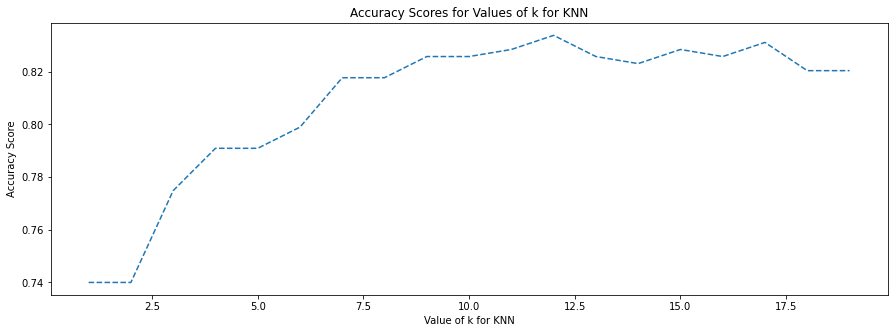

In [94]:
# plot accuracy scores vs k values
plt.figure(2,figsize=(15,5))
plt.plot(lrange,scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k for KNN')
plt.show()

In [95]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
metrics.accuracy_score(y_test,y_pred)

0.8203753351206434

In [96]:
print(confusion_matrix(y_test,y_pred))

[[205  12   0   0   0]
 [ 35  94   0   0   0]
 [  0  16   7   0   0]
 [  0   1   2   0   0]
 [  0   1   0   0   0]]


In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       217
           1       0.76      0.73      0.74       129
           2       0.78      0.30      0.44        23
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.82       373
   macro avg       0.48      0.40      0.42       373
weighted avg       0.81      0.82      0.81       373



# TUNING : CV + OPTIMAL K (1)

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
# empty variable foor storing the KNN metrics
scores = []

The optimal number of neighbors is 15
The optimal score is 0.803
[0.79310345 0.82758621 0.79310345 0.7816092  0.77011494 0.85057471
 0.74712644 0.77011494 0.84883721 0.8255814 ]


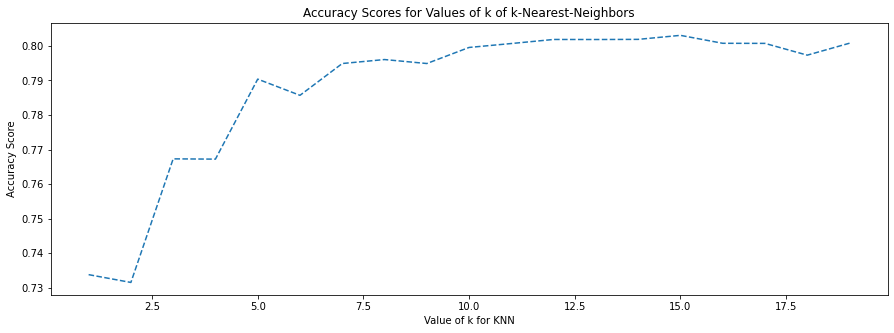

In [100]:
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=np.arange(1,20)

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    # get score for the 10 fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

optimal_k = lrange[scores.index(max(scores))]
          
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.3f" % max(scores))

plt.figure(2,figsize=(15,5))
print(score)    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

[0.79310345 0.82758621 0.79310345 0.7816092  0.77011494 0.85057471
 0.74712644 0.77011494 0.84883721 0.8255814 ]


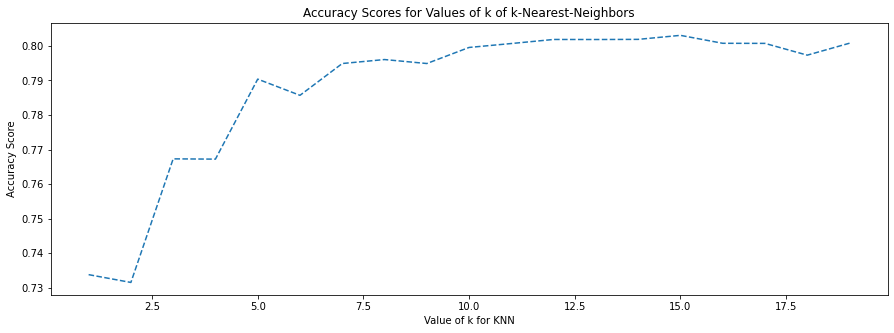

In [101]:
plt.figure(2,figsize=(15,5))
print(score)    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [102]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
metrics.accuracy_score(y_test,y_pred)

0.8203753351206434

In [103]:
print(confusion_matrix(y_test,y_pred))

[[205  12   0   0   0]
 [ 35  94   0   0   0]
 [  0  16   7   0   0]
 [  0   1   2   0   0]
 [  0   1   0   0   0]]


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       217
           1       0.76      0.73      0.74       129
           2       0.78      0.30      0.44        23
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.82       373
   macro avg       0.48      0.40      0.42       373
weighted avg       0.81      0.82      0.81       373



# TUNING : OPTIMAL K (2)

In [105]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

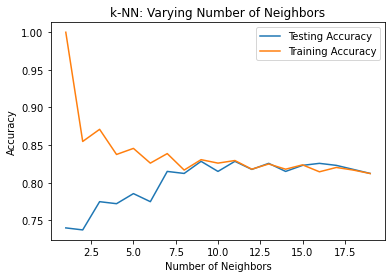

In [106]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# TUNING : CV + OPTIMAL K (2)

In [107]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_

{'n_neighbors': 15}

In [108]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_cv = GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

metrics.accuracy_score(y_test,y_pred)

0.8203753351206434

In [109]:
print(confusion_matrix(y_test,y_pred))

[[205  12   0   0   0]
 [ 35  94   0   0   0]
 [  0  16   7   0   0]
 [  0   1   2   0   0]
 [  0   1   0   0   0]]


In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       217
           1       0.76      0.73      0.74       129
           2       0.78      0.30      0.44        23
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.82       373
   macro avg       0.48      0.40      0.42       373
weighted avg       0.81      0.82      0.81       373

